In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [2]:
df = pd.read_csv('Aadhar_Updated_Data.csv', parse_dates=['date'])

In [3]:
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['figure.autolayout'] = True
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11

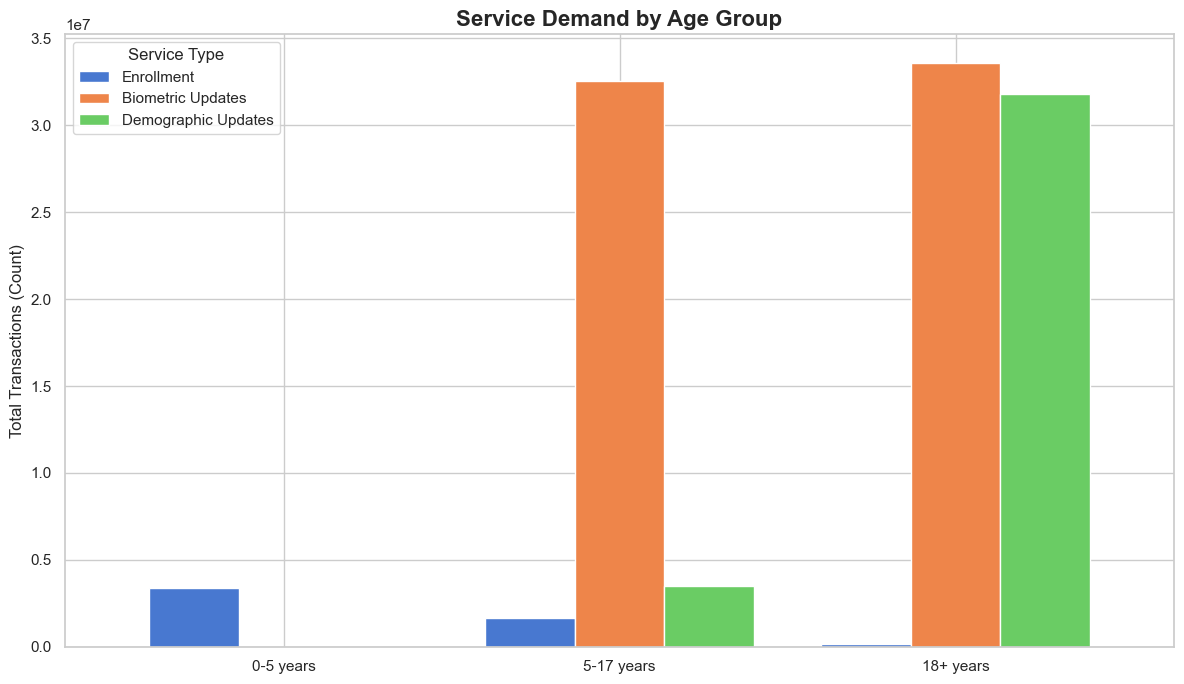

Insight: The highest enrollment is seen in the 0-5 years group.


In [4]:
# Create a summary of Age Groups
age_summary = pd.DataFrame({
    'Enrollment': [df['age_0_5'].sum(), df['age_5_17'].sum(), df['age_18_greater'].sum()],
    'Biometric Updates': [0, df['bio_age_5_17'].sum(), df['bio_age_17_'].sum()],
    'Demographic Updates': [0, df['demo_age_5_17'].sum(), df['demo_age_17_'].sum()]
}, index=['0-5 years', '5-17 years', '18+ years'])
age_summary.plot(kind='bar', stacked=False, width=0.8)
plt.title('Service Demand by Age Group', fontsize=16, fontweight='bold')
plt.ylabel('Total Transactions (Count)')
plt.xticks(rotation=0)
plt.legend(title="Service Type")
plt.savefig('Age_Group_Insight.png', bbox_inches='tight')
plt.show()
top_enroll_age = age_summary['Enrollment'].idxmax()
print(f"Insight: The highest enrollment is seen in the {top_enroll_age} group.")

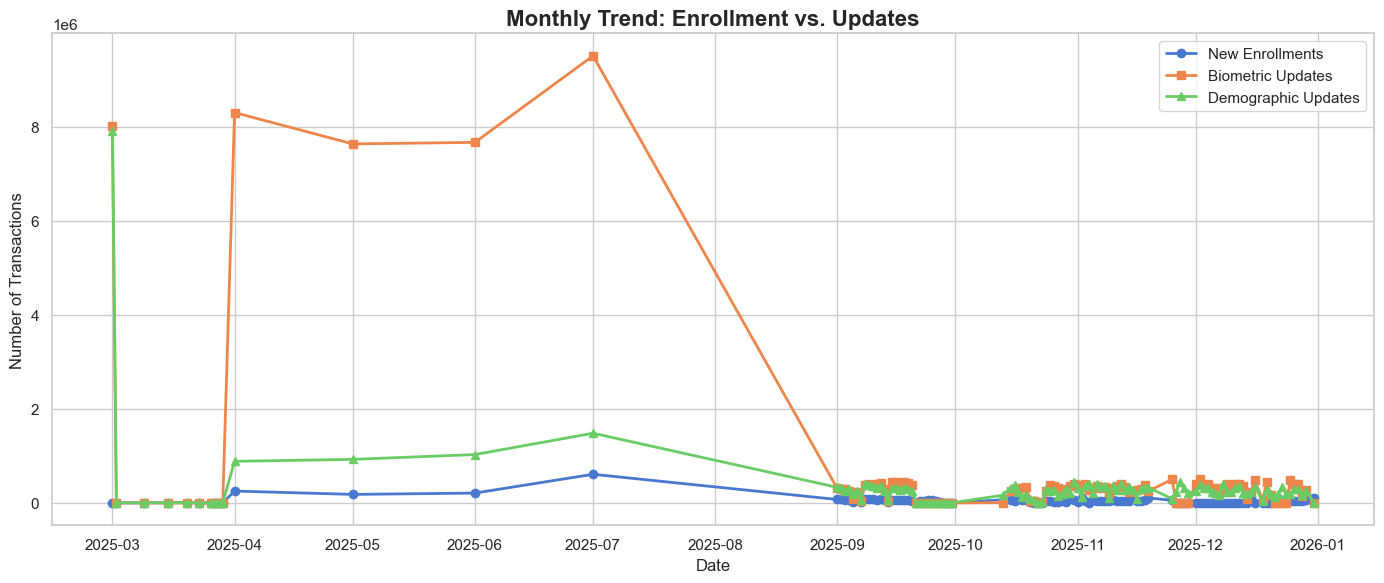

In [5]:
time_df = df.groupby('date')[['total_enrollment', 'total_biometric', 'total_demography']].sum()
plt.figure(figsize=(14, 6))
plt.plot(time_df.index, time_df['total_enrollment'], label='New Enrollments', marker='o', linewidth=2)
plt.plot(time_df.index, time_df['total_biometric'], label='Biometric Updates', marker='s', linewidth=2)
plt.plot(time_df.index, time_df['total_demography'], label='Demographic Updates', marker='^', linewidth=2)
plt.title('Monthly Trend: Enrollment vs. Updates', fontsize=16, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.legend()
plt.savefig('Time_Series_Trends.png')
plt.show()

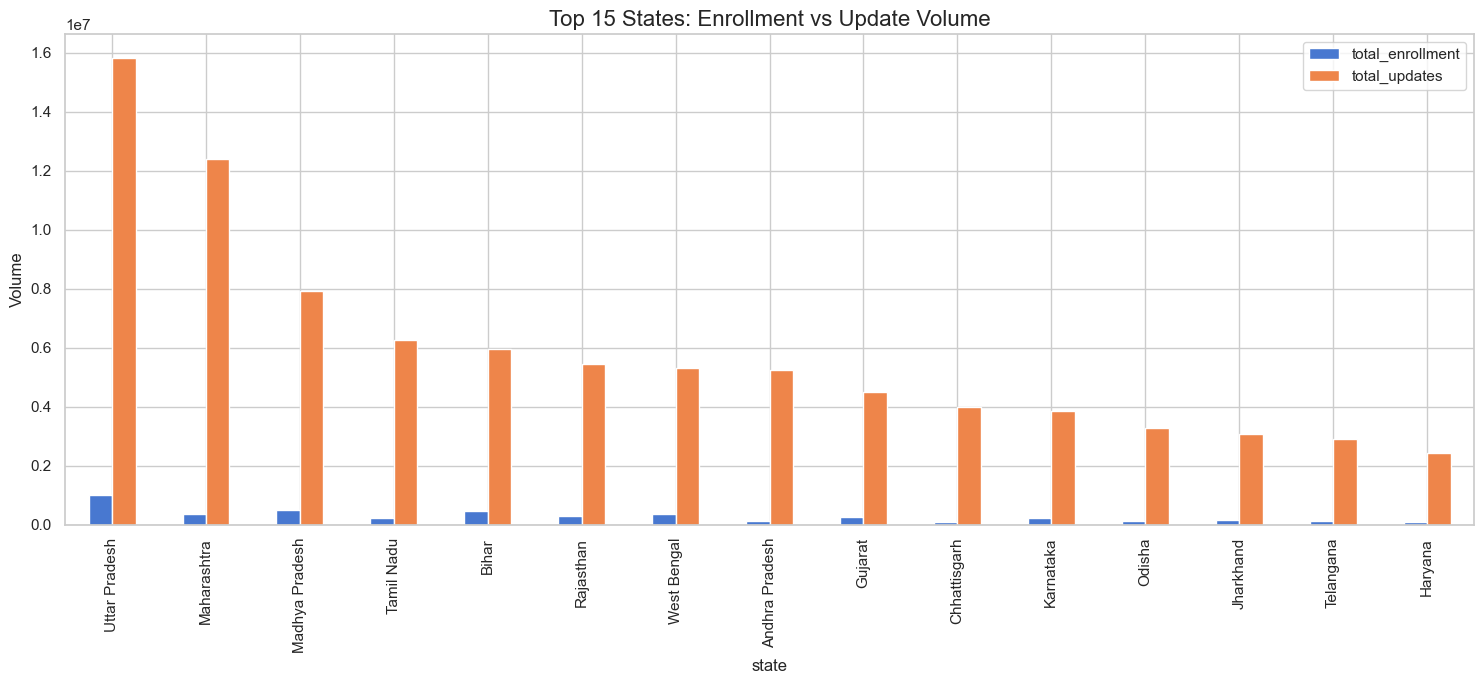

In [6]:
state_perf = df.groupby('state').agg({
    'total_enrollment': 'sum',
    'total_updates': 'sum',
    'maturity_pct': 'mean'
}).sort_values('total_updates', ascending=False).head(15)

# Bivariate Plot: Enrollment vs Updates per State
state_perf[['total_enrollment', 'total_updates']].plot(kind='bar', figsize=(15, 7))
plt.title('Top 15 States: Enrollment vs Update Volume', fontsize=16)
plt.ylabel('Volume')
plt.savefig('State_Bivariate_Analysis.png')
plt.show()

C:\Users\susin\AppData\Local\Temp\ipykernel_8012\1797228936.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=enroll_age, palette='Blues_d')


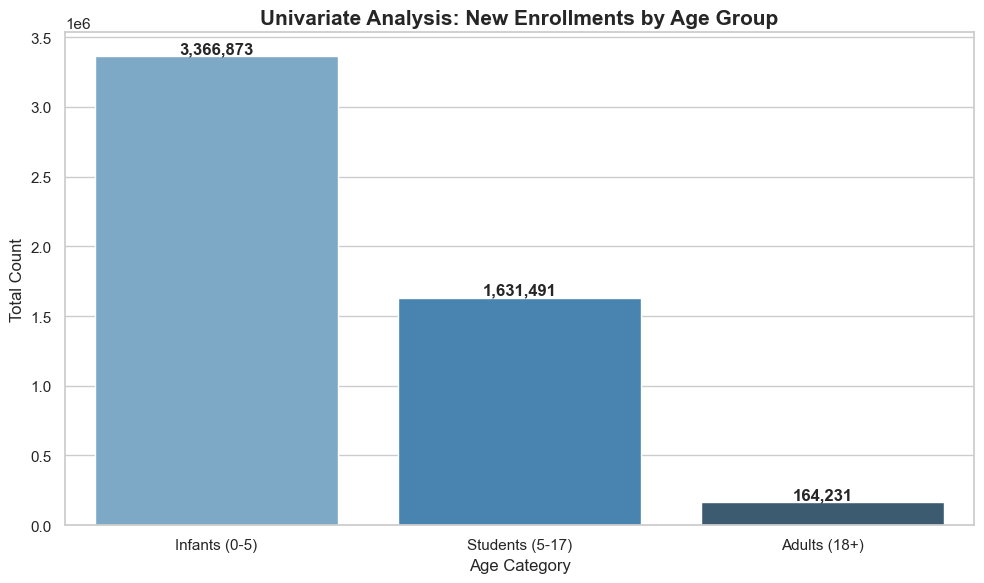

In [7]:
# 1. ENROLLMENT AGE DISTRIBUTION
enroll_age = [df['age_0_5'].sum(), df['age_5_17'].sum(), df['age_18_greater'].sum()]
labels = ['Infants (0-5)', 'Students (5-17)', 'Adults (18+)']

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=enroll_age, palette='Blues_d')
plt.title('Univariate Analysis: New Enrollments by Age Group', fontsize=15, fontweight='bold')
plt.ylabel('Total Count')
plt.xlabel('Age Category')

# Adding data labels for precision
for i, val in enumerate(enroll_age):
    plt.text(i, val, f'{int(val):,}', ha='center', va='bottom', fontweight='bold')

plt.savefig('Univariate_Enrollment_Age.png', bbox_inches='tight')
plt.show()

C:\Users\susin\AppData\Local\Temp\ipykernel_8012\3619067560.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=bio_age, palette='Oranges_d')


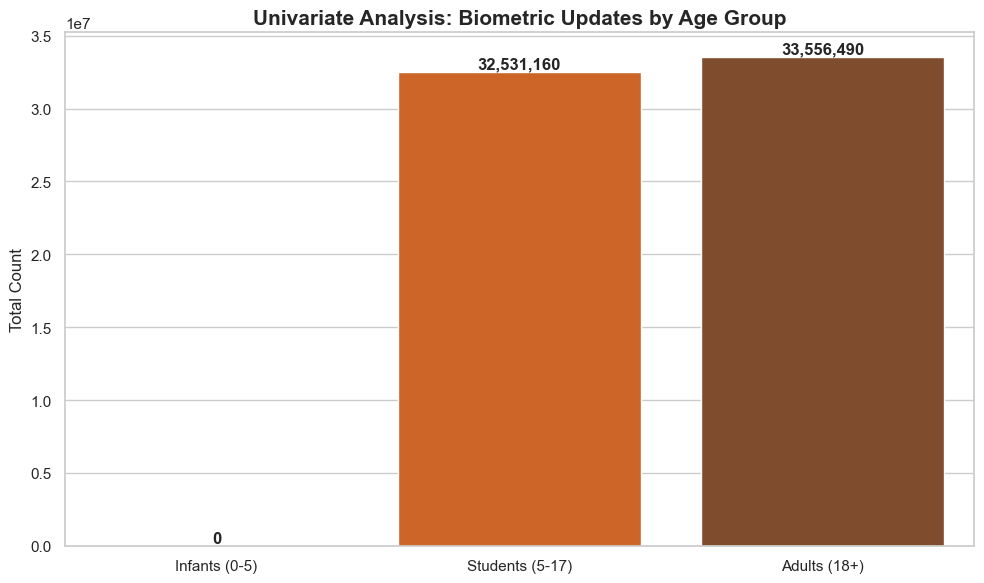

In [8]:
# 2. BIOMETRIC UPDATE DISTRIBUTION
# Infants 0-5 do not have biometrics recorded typically
bio_age = [0, df['bio_age_5_17'].sum(), df['bio_age_17_'].sum()]
labels = ['Infants (0-5)', 'Students (5-17)', 'Adults (18+)']

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=bio_age, palette='Oranges_d')
plt.title('Univariate Analysis: Biometric Updates by Age Group', fontsize=15, fontweight='bold')
plt.ylabel('Total Count')

for i, val in enumerate(bio_age):
    plt.text(i, val, f'{int(val):,}', ha='center', va='bottom', fontweight='bold')

plt.savefig('Univariate_Biometric_Age.png', bbox_inches='tight')
plt.show()

C:\Users\susin\AppData\Local\Temp\ipykernel_8012\3995833955.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=demo_age, palette='Greens_d')


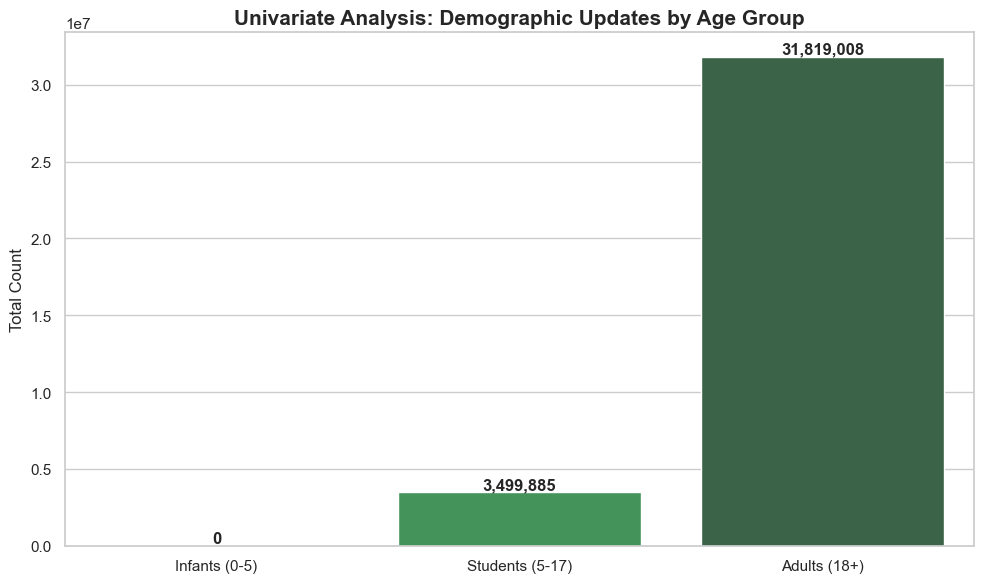

In [9]:
# 3. DEMOGRAPHIC UPDATE DISTRIBUTION
demo_age = [0, df['demo_age_5_17'].sum(), df['demo_age_17_'].sum()]
labels = ['Infants (0-5)', 'Students (5-17)', 'Adults (18+)']

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=demo_age, palette='Greens_d')
plt.title('Univariate Analysis: Demographic Updates by Age Group', fontsize=15, fontweight='bold')
plt.ylabel('Total Count')

for i, val in enumerate(demo_age):
    plt.text(i, val, f'{int(val):,}', ha='center', va='bottom', fontweight='bold')

plt.savefig('Univariate_Demographic_Age.png', bbox_inches='tight')
plt.show()

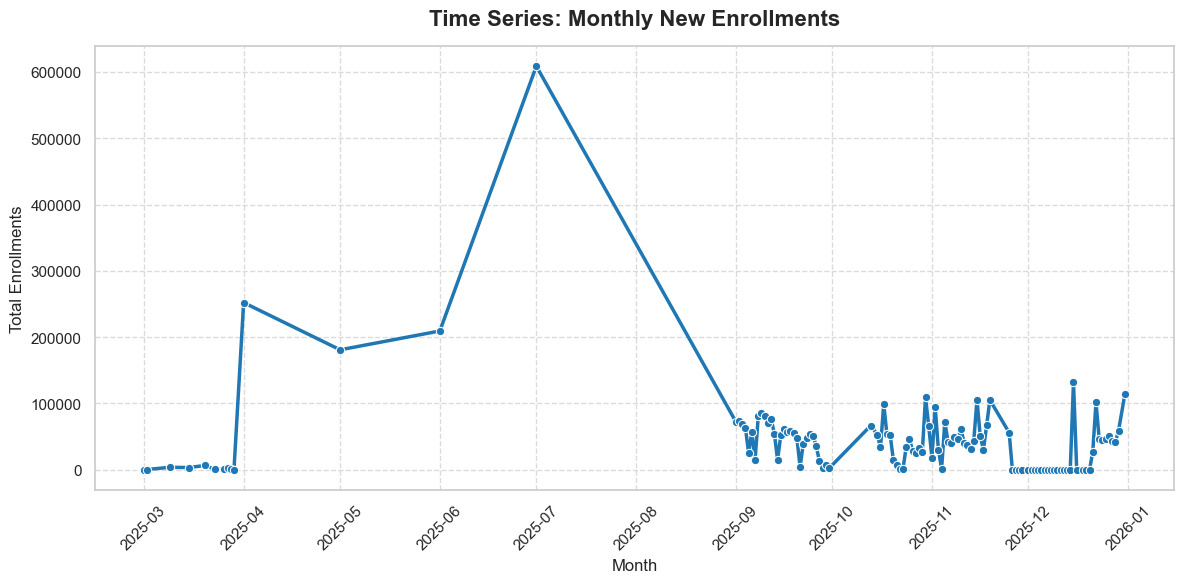

In [10]:
# Aggregate by date
enroll_trend = df.groupby('date')['total_enrollment'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=enroll_trend, x='date', y='total_enrollment', marker='o', color='#1f77b4', linewidth=2.5)
plt.title('Time Series: Monthly New Enrollments', fontsize=16, fontweight='bold', pad=15)
plt.ylabel('Total Enrollments')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

plt.savefig('Trend_Enrollment.png', bbox_inches='tight')
plt.show()

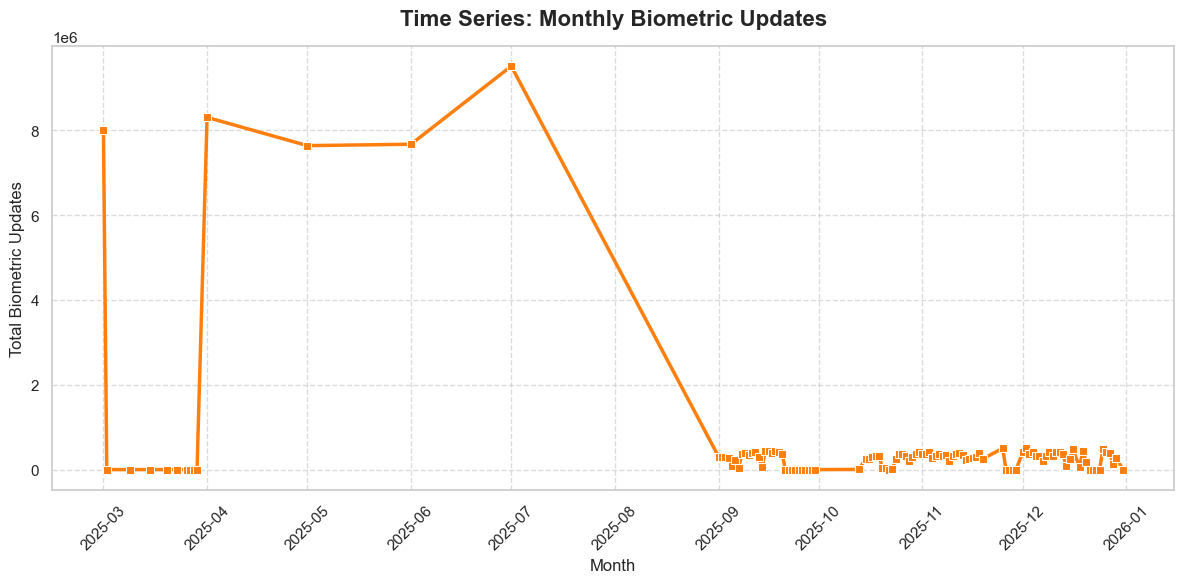

In [11]:
# Aggregate by date
bio_trend = df.groupby('date')['total_biometric'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=bio_trend, x='date', y='total_biometric', marker='s', color='#ff7f0e', linewidth=2.5)
plt.title('Time Series: Monthly Biometric Updates', fontsize=16, fontweight='bold', pad=15)
plt.ylabel('Total Biometric Updates')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

plt.savefig('Trend_Biometric.png', bbox_inches='tight')
plt.show()

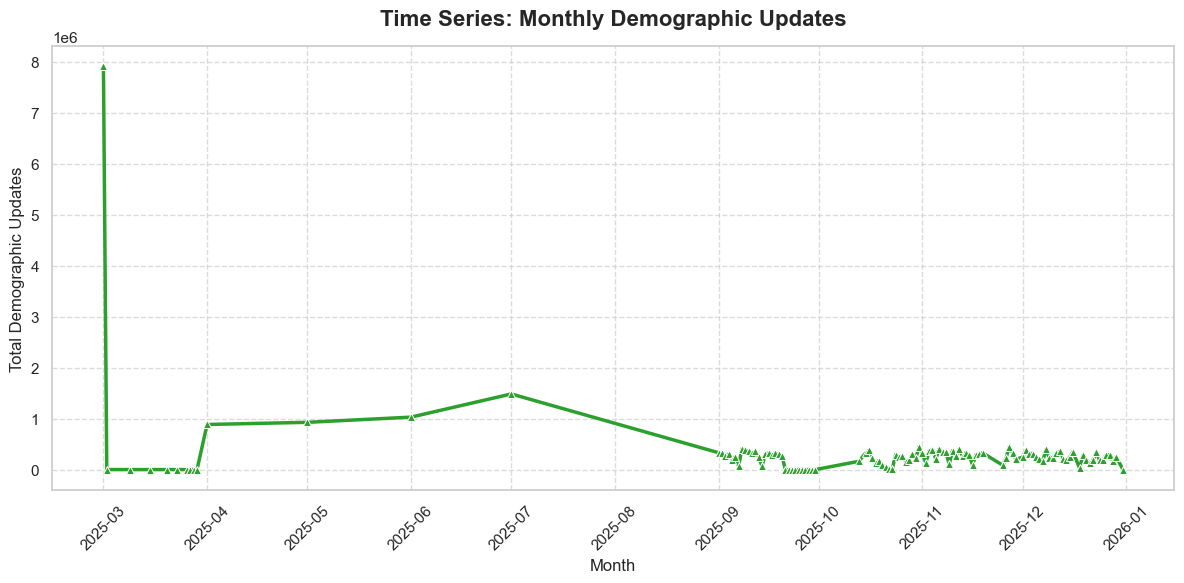

In [12]:
# Aggregate by date
demo_trend = df.groupby('date')['total_demography'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=demo_trend, x='date', y='total_demography', marker='^', color='#2ca02c', linewidth=2.5)
plt.title('Time Series: Monthly Demographic Updates', fontsize=16, fontweight='bold', pad=15)
plt.ylabel('Total Demographic Updates')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

plt.savefig('Trend_Demographic.png', bbox_inches='tight')
plt.show()

C:\Users\susin\AppData\Local\Temp\ipykernel_8012\1890085455.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_enroll, x='total_enrollment', y='state', palette='Blues_r')


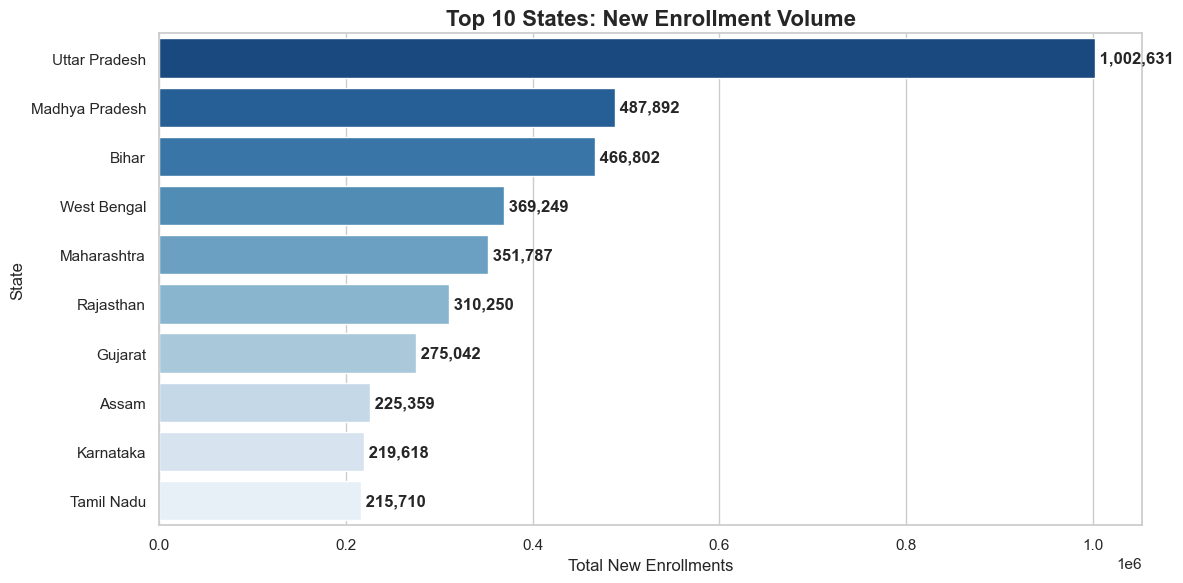

In [13]:
# Aggregate Enrollment by State
state_enroll = df.groupby('state')['total_enrollment'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=state_enroll, x='total_enrollment', y='state', palette='Blues_r')
plt.title('Top 10 States: New Enrollment Volume', fontsize=16, fontweight='bold')
plt.xlabel('Total New Enrollments')
plt.ylabel('State')

# Add values on bars
for i, val in enumerate(state_enroll['total_enrollment']):
    plt.text(val, i, f' {int(val):,}', va='center', fontweight='bold')

plt.savefig('State_Enrollment_Leaderboard.png', bbox_inches='tight')
plt.show()

C:\Users\susin\AppData\Local\Temp\ipykernel_8012\1806083025.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_bio, x='total_biometric', y='state', palette='Oranges_r')


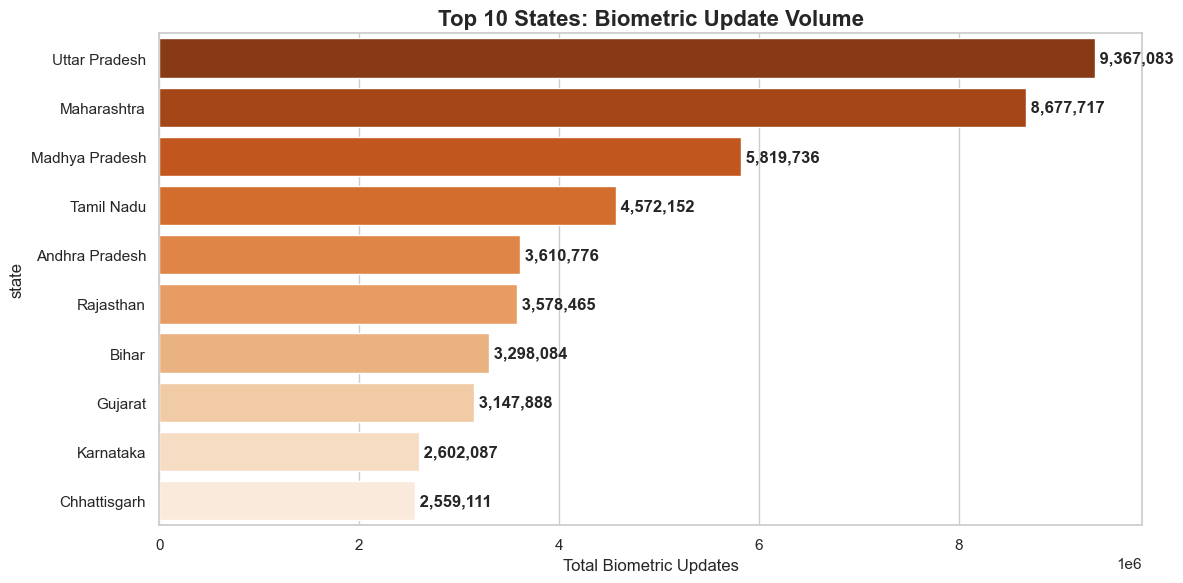

In [14]:
# Aggregate Biometrics by State
state_bio = df.groupby('state')['total_biometric'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=state_bio, x='total_biometric', y='state', palette='Oranges_r')
plt.title('Top 10 States: Biometric Update Volume', fontsize=16, fontweight='bold')
plt.xlabel('Total Biometric Updates')

for i, val in enumerate(state_bio['total_biometric']):
    plt.text(val, i, f' {int(val):,}', va='center', fontweight='bold')

plt.savefig('State_Biometric_Leaderboard.png', bbox_inches='tight')
plt.show()

C:\Users\susin\AppData\Local\Temp\ipykernel_8012\1981391678.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_demo, x='total_demography', y='state', palette='Greens_r')


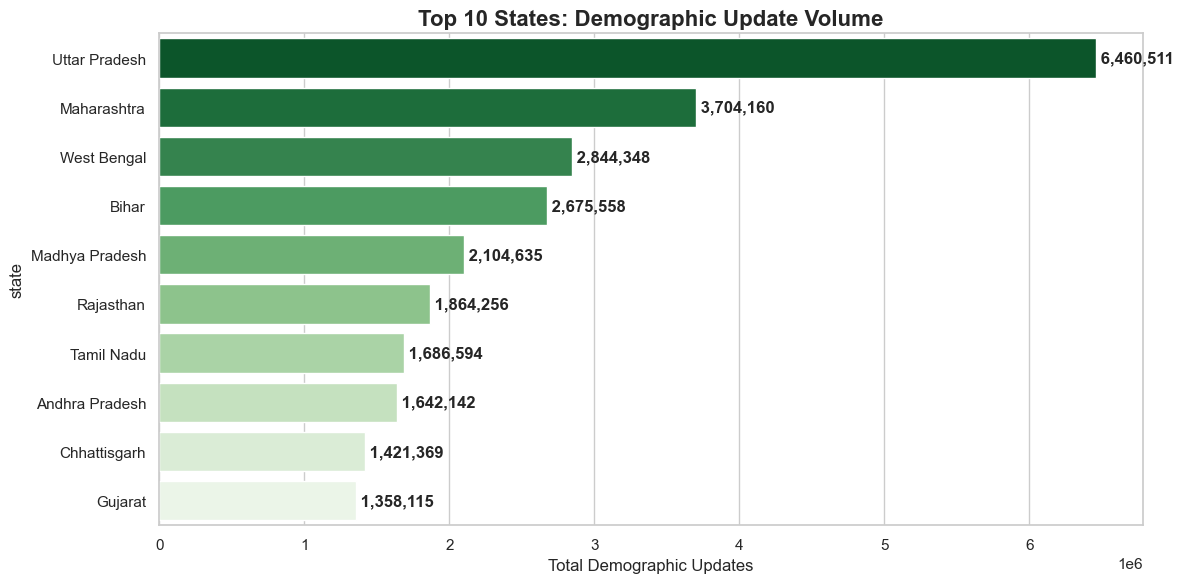

In [15]:
# Aggregate Demography by State
state_demo = df.groupby('state')['total_demography'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=state_demo, x='total_demography', y='state', palette='Greens_r')
plt.title('Top 10 States: Demographic Update Volume', fontsize=16, fontweight='bold')
plt.xlabel('Total Demographic Updates')

for i, val in enumerate(state_demo['total_demography']):
    plt.text(val, i, f' {int(val):,}', va='center', fontweight='bold')

plt.savefig('State_Demographic_Leaderboard.png', bbox_inches='tight')
plt.show()

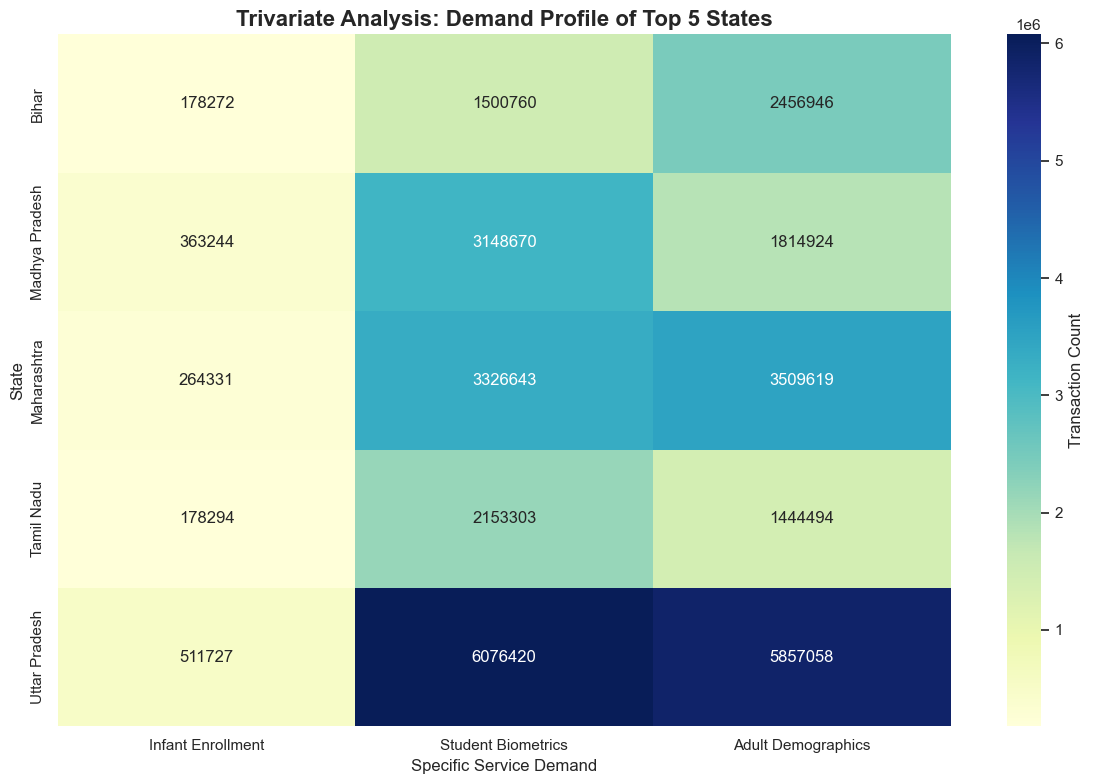

In [16]:
# 1. Get Top 5 states by total workload
top_5_states = df.groupby('state')['total_workload'].sum().nlargest(5).index

# 2. Prepare data for heatmap: State vs Age Group vs Service
# We use Enrollment Age 0-5, Bio Age 5-17, and Demo Age 18+ for a unique story
trivariate_data = df[df['state'].isin(top_5_states)].groupby('state').agg({
    'age_0_5': 'sum',
    'bio_age_5_17': 'sum',
    'demo_age_17_': 'sum'
})

# Rename columns for clarity in the chart
trivariate_data.columns = ['Infant Enrollment', 'Student Biometrics', 'Adult Demographics']

plt.figure(figsize=(12, 8))
sns.heatmap(trivariate_data, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Transaction Count'})
plt.title('Trivariate Analysis: Demand Profile of Top 5 States', fontsize=16, fontweight='bold')
plt.ylabel('State')
plt.xlabel('Specific Service Demand')

plt.savefig('Trivariate_State_Demand_Profile.png', bbox_inches='tight')
plt.show()

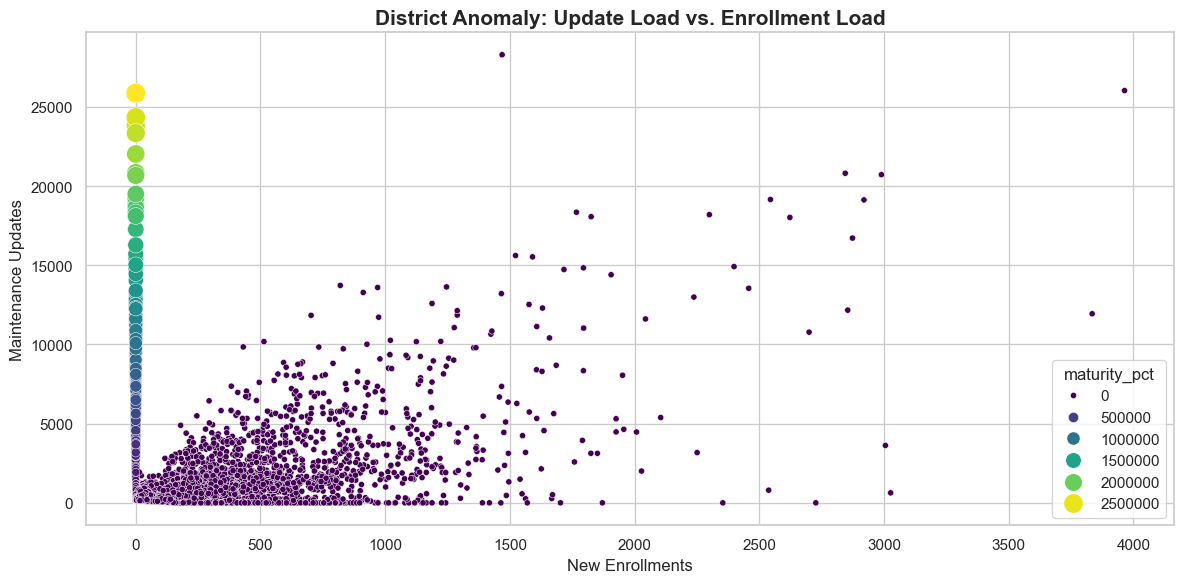

In [17]:
# Filter for significant volume to avoid tiny pincode noise
high_vol_df = df[df['total_workload'] > df['total_workload'].quantile(0.95)]

# Find top 10 'Anomaly' Districts by Maturity
maturity_anomalies = high_vol_df.sort_values(by='maturity_pct', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=high_vol_df, x='total_enrollment', y='total_updates',
                size='maturity_pct', hue='maturity_pct', sizes=(20, 200), palette='viridis')
plt.title('District Anomaly: Update Load vs. Enrollment Load', fontsize=15, fontweight='bold')
plt.xlabel('New Enrollments')
plt.ylabel('Maintenance Updates')
plt.savefig('Anomaly_Maturity_Scatter.png')
plt.show()

In [18]:
# Calculate Z-Score for Migration Index to find statistical outliers
df['migration_zscore'] = (df['migration_pct'] - df['migration_pct'].mean()) / df['migration_pct'].std()

# Top 5 Migration "Hotspots"
migration_hotspots = df[df['migration_zscore'] > 3].groupby('district')['migration_pct'].mean().sort_values(ascending=False).head(5)

print("🚨 MIGRATION ANOMALIES DETECTED 🚨")
print("The following districts show update activity 3x higher than the national average:")
print(migration_hotspots)

🚨 MIGRATION ANOMALIES DETECTED 🚨
The following districts show update activity 3x higher than the national average:
district
Kondagaon     433450.000000
Mahasamund    358487.500000
Banswara      303472.727273
East Delhi    299346.666667
North East    290800.000000
Name: migration_pct, dtype: float64


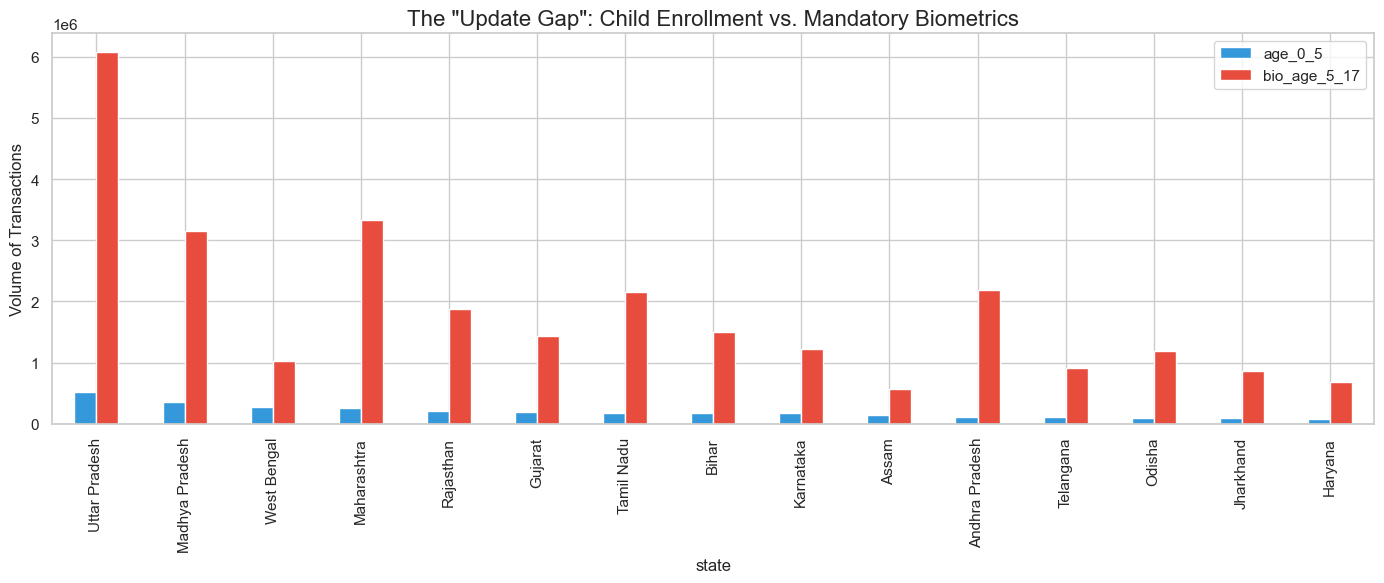

In [19]:
# Group by state for top 15
child_vs_bio = df.groupby('state').agg({
    'age_0_5': 'sum',           # New Child Enrollment
    'bio_age_5_17': 'sum'       # Mandatory Biometric Update
}).sort_values(by='age_0_5', ascending=False).head(15)

child_vs_bio.plot(kind='bar', figsize=(14, 6), color=['#3498db', '#e74c3c'])
plt.title('The "Update Gap": Child Enrollment vs. Mandatory Biometrics', fontsize=16)
plt.ylabel('Volume of Transactions')
plt.savefig('Child_vs_Biometric_Gap.png')
plt.show()

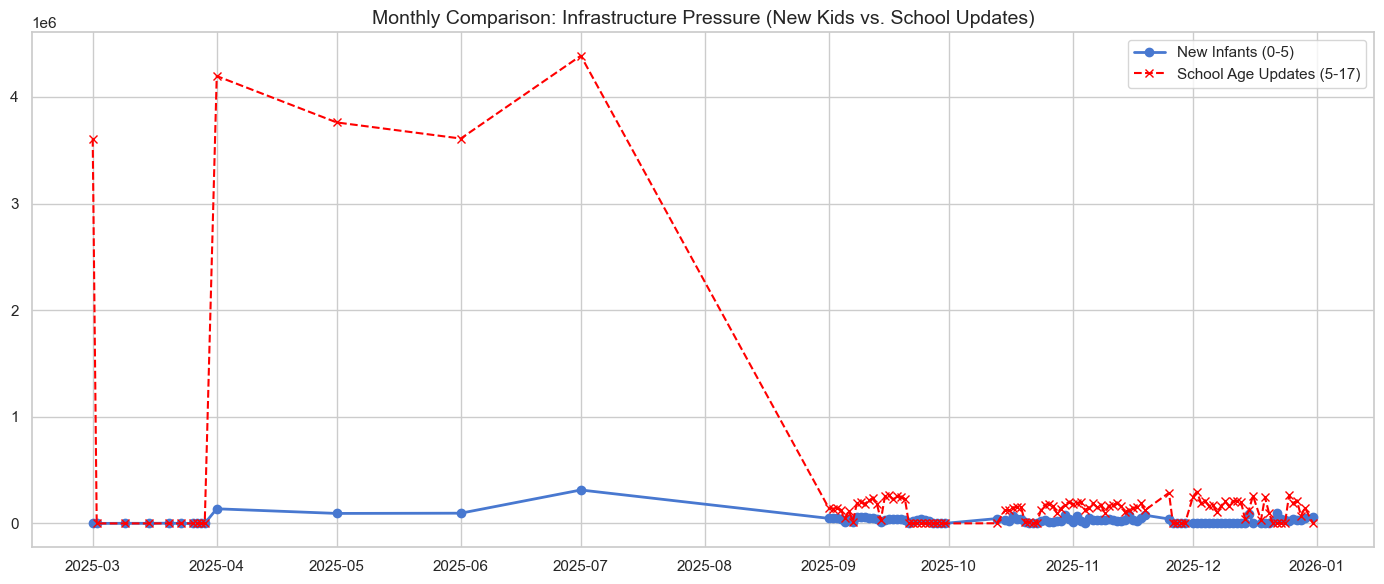

In [20]:
monthly_gap = df.groupby('date').agg({
    'age_0_5': 'sum',
    'bio_age_5_17': 'sum'
})

plt.figure(figsize=(14, 6))
plt.plot(monthly_gap.index, monthly_gap['age_0_5'], label='New Infants (0-5)', marker='o', linewidth=2)
plt.plot(monthly_gap.index, monthly_gap['bio_age_5_17'], label='School Age Updates (5-17)', marker='x', linestyle='--', color='red')
plt.title('Monthly Comparison: Infrastructure Pressure (New Kids vs. School Updates)')
plt.legend()
plt.savefig('Monthly_School_Pressure.png')
plt.show()

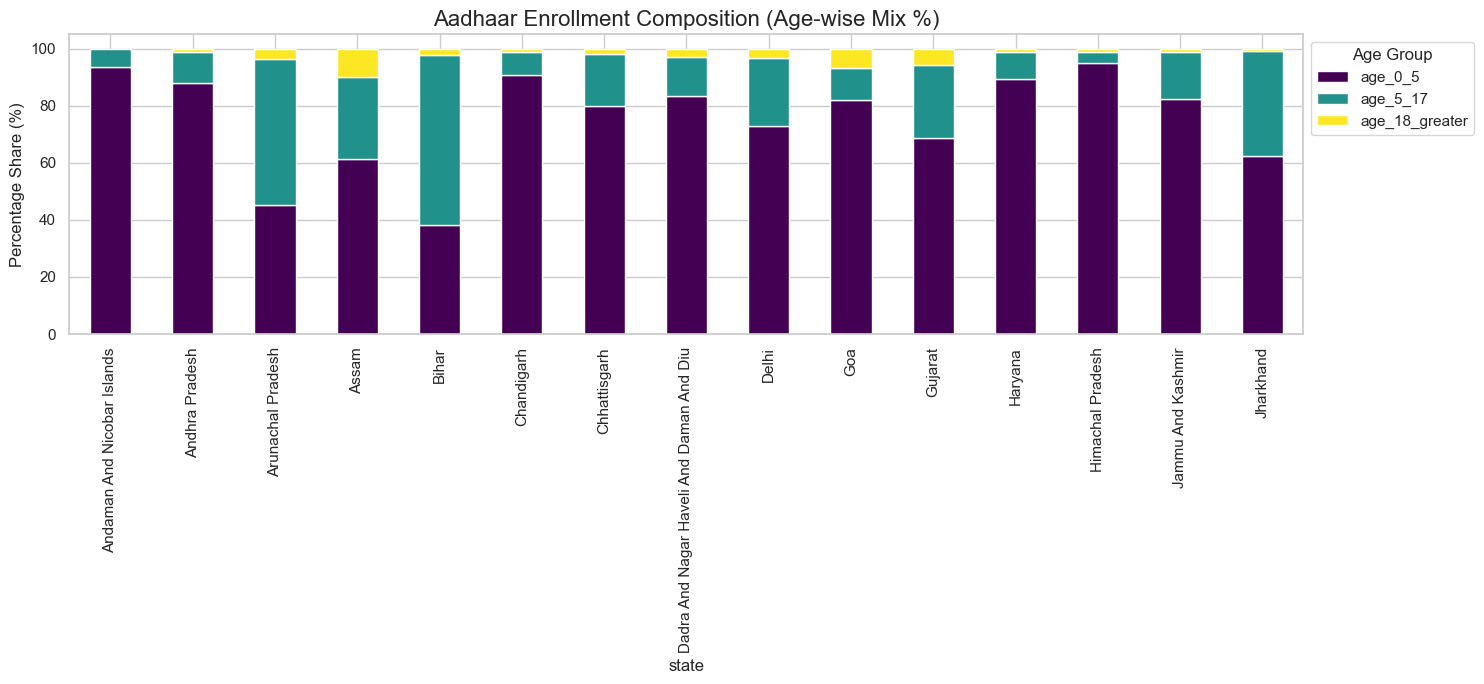

In [21]:
mix_data = df.groupby('state')[['age_0_5', 'age_5_17', 'age_18_greater']].sum().head(15)

# Normalize to 100% to see the proportion (The "Mix")
mix_pct = mix_data.div(mix_data.sum(axis=1), axis=0) * 100

mix_pct.plot(kind='bar', stacked=True, figsize=(15, 7), colormap='viridis')
plt.title('Aadhaar Enrollment Composition (Age-wise Mix %)', fontsize=16)
plt.ylabel('Percentage Share (%)')
plt.legend(title="Age Group", bbox_to_anchor=(1, 1))
plt.savefig('Enrollment_Mix_State.png')
plt.show()

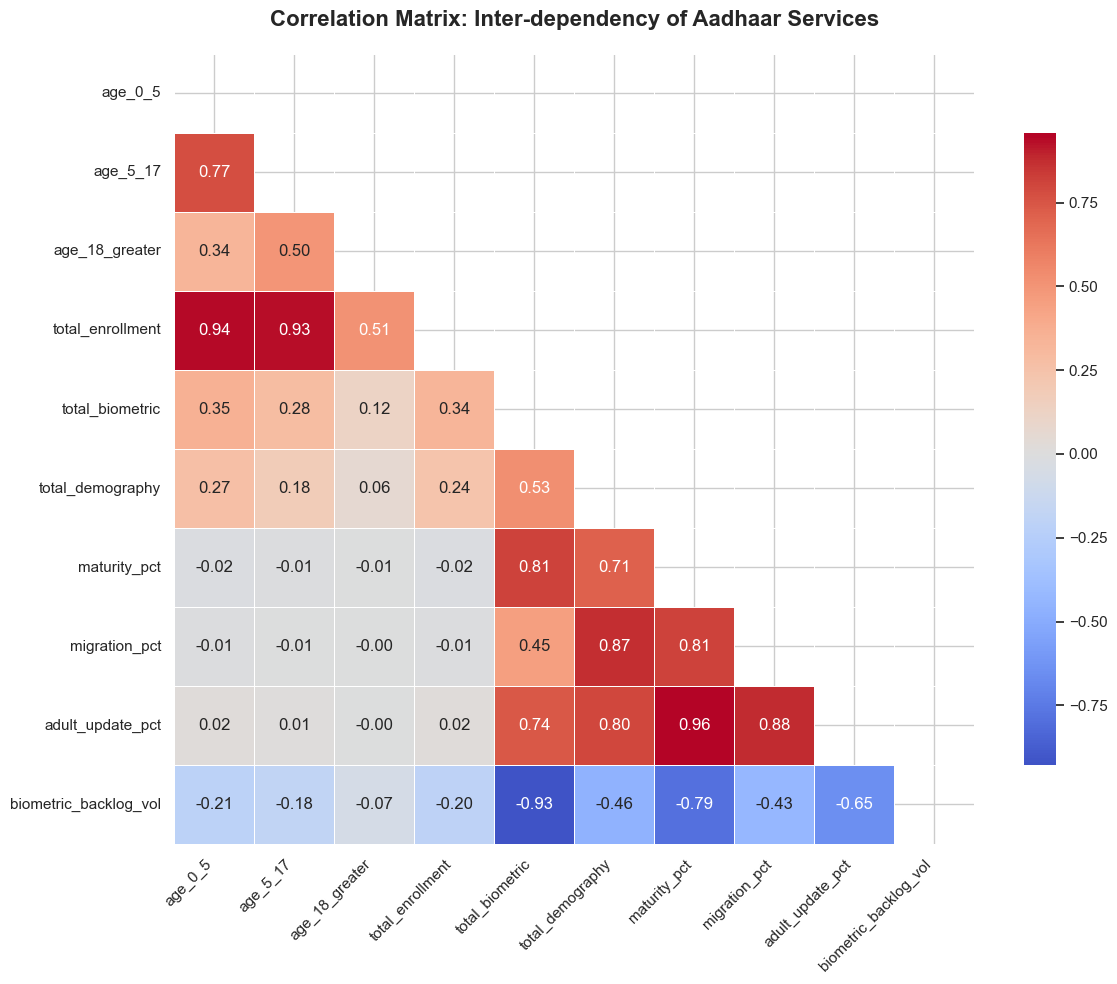

In [23]:
# 1. Selecting the most impactful numerical columns
corr_cols = [
    'age_0_5', 'age_5_17', 'age_18_greater',
    'total_enrollment', 'total_biometric', 'total_demography',
    'maturity_pct', 'migration_pct', 'adult_update_pct',
    'biometric_backlog_vol'
]

# 2. Calculate the correlation matrix
corr_matrix = df[corr_cols].corr()

# 3. Create the Heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) # Masking the upper triangle for better readability

sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    linewidths=.5,
    cbar_kws={"shrink": .8}
)

plt.title('Correlation Matrix: Inter-dependency of Aadhaar Services', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.savefig('Correlation_Heatmap.png', bbox_inches='tight')
plt.show()

In [31]:
import plotly.express as px

# Aggregating by State for a cleaner visual
state_share = df.groupby('state')['workload_share_pct'].sum().reset_index()

fig = px.treemap(state_share,
                 path=['state'],
                 values='workload_share_pct',
                 title='National Aadhaar Workload Share by State',
                 color='workload_share_pct',
                 color_continuous_scale='RdYlGn_r') # Red for high share/stress
fig.show()
fig.write_html("workload_treemap.html")

In [33]:
# 1. Top 10 by Biometric Backlog (Future Risk)
top_backlog = df.groupby('district')['biometric_backlog_vol'].sum().nlargest(10)

# 2. Top 10 by Maintenance Intensity (Operational Saturation)
top_intensity = df.groupby('district')['maintenance_intensity_pct'].mean().nlargest(10)

print("TOP 10 DISTRICTS REQUIRING IMMEDIATE BIOMETRIC CAMPS:")
print(top_backlog)

print("\nTOP 10 DISTRICTS TO CONVERT TO PERMANENT UPDATE HUBS:")
print(top_intensity)

TOP 10 DISTRICTS REQUIRING IMMEDIATE BIOMETRIC CAMPS:
district
Bengaluru Urban       12111.0
Dinajpur Uttar         6478.0
Banas Kantha           5932.0
Pashchim Champaran     5023.0
Purbi Champaran        4000.0
24 Paraganas North     3177.0
Ahmadabad              3145.0
Dohad                  2816.0
Coochbehar             2140.0
Gurugram               1804.0
Name: biometric_backlog_vol, dtype: float64

TOP 10 DISTRICTS TO CONVERT TO PERMANENT UPDATE HUBS:
district
Manendragarhchirmiribharatpur    98.916667
Gadchiroli                       87.175540
Thoubal                          86.603382
Yavatmal                         86.342671
Imphal West                      86.077096
Janjgir-Champa                   85.927654
Rajnandgaon                      85.843459
Kawardha                         85.349700
Chandrapur                       85.153999
Beed                             85.012925
Name: maintenance_intensity_pct, dtype: float64


In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Select features for clustering
cluster_features = ['maturity_pct', 'maintenance_intensity_pct', 'biometric_backlog_vol']
X = df.groupby('district')[cluster_features].mean().dropna()

# 2. Normalize and Cluster
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
X['Service_Profile'] = kmeans.fit_predict(X_scaled)

# 3. View the Result
print("📊 DISTRICT SEGMENTATION SUMMARY:")
print(X.groupby('Service_Profile').mean())

📊 DISTRICT SEGMENTATION SUMMARY:
                 maturity_pct  maintenance_intensity_pct  \
Service_Profile                                            
0                 7215.855060                  79.156202   
1                    0.000000                   0.000000   
2                 1751.905967                  69.494527   

                 biometric_backlog_vol  
Service_Profile                         
0                           -30.235747  
1                           263.740881  
2                            -6.093980  


In [35]:
# 1. Aggregate Data by State
state_perf = df.groupby('state').agg({
    'total_enrollment': 'sum',
    'total_updates': 'sum'
}).reset_index()

# 2. Calculate National Benchmarks (Averages)
avg_enrollment = state_perf['total_enrollment'].mean()
avg_updates = state_perf['total_updates'].mean()

# 3. Categorization Logic
def categorize_state(row):
    if row['total_enrollment'] >= avg_enrollment and row['total_updates'] >= avg_updates:
        return 'Quadrant 1: Mature Leaders (High Growth & High Maintenance)'
    elif row['total_enrollment'] < avg_enrollment and row['total_updates'] >= avg_updates:
        return 'Quadrant 2: Maintenance Hubs (Low Growth, High Maintenance)'
    elif row['total_enrollment'] >= avg_enrollment and row['total_updates'] < avg_updates:
        return 'Quadrant 3: Growth Fronts (High Growth, Low Maintenance)'
    else:
        return 'Quadrant 4: Emerging / Saturated Small States (Low Activity)'

state_perf['Quadrant'] = state_perf.apply(categorize_state, axis=1)

# 4. Display as a Categorized List
for quadrant in sorted(state_perf['Quadrant'].unique()):
    print(f"\n--- {quadrant} ---")
    states = state_perf[state_perf['Quadrant'] == quadrant]['state'].tolist()
    print(", ".join(states))


--- Quadrant 1: Mature Leaders (High Growth & High Maintenance) ---
Bihar, Gujarat, Jharkhand, Karnataka, Madhya Pradesh, Maharashtra, Rajasthan, Tamil Nadu, Uttar Pradesh, West Bengal

--- Quadrant 2: Maintenance Hubs (Low Growth, High Maintenance) ---
Andhra Pradesh, Chhattisgarh, Odisha, Telangana

--- Quadrant 3: Growth Fronts (High Growth, Low Maintenance) ---
Assam

--- Quadrant 4: Emerging / Saturated Small States (Low Activity) ---
Andaman And Nicobar Islands, Arunachal Pradesh, Chandigarh, Dadra And Nagar Haveli And Daman And Diu, Delhi, Goa, Haryana, Himachal Pradesh, Jammu And Kashmir, Kerala, Ladakh, Lakshadweep, Manipur, Meghalaya, Mizoram, Nagaland, Pondicherry, Punjab, Sikkim, Tripura, Uttarakhand


In [36]:
# 1. THE DISTRICT STRESS REPORT (Top 50 most burdened districts)
report_1 = df.groupby(['state', 'district'])[['total_workload', 'workload_share_pct', 'maintenance_intensity_pct']].mean()
report_1.sort_values('workload_share_pct', ascending=False).head(50).to_csv('01_District_Stress_Analysis.csv')

# 2. THE CHILD BACKLOG TRACKER (Districts where kids need urgent biometric updates)
report_2 = df.groupby(['state', 'district'])['biometric_backlog_vol'].sum().reset_index()
report_2.sort_values('biometric_backlog_vol', ascending=False).to_csv('02_Biometric_Backlog_Priority.csv', index=False)

# 3. THE MIGRATION PULSE (Districts with highest adult demographic changes)
report_3 = df.groupby(['state', 'district'])['migration_pct'].mean().reset_index()
report_3.sort_values('migration_pct', ascending=False).to_csv('03_Migration_Hotspots.csv', index=False)

# 4. STATE MATURITY LEADERBOARD (Categorizing states by saturation)
report_4 = df.groupby('state').agg({
    'maturity_pct': 'mean',
    'total_enrollment': 'sum',
    'total_updates': 'sum'
}).sort_values('maturity_pct', ascending=False)
report_4.to_csv('04_State_Maturity_Index.csv')

# 5. PINCODE OUTLIERS (The top 100 most active Pincodes in India)
report_5 = df.groupby(['state', 'district', 'pincode'])['total_workload'].sum().reset_index()
report_5.sort_values('total_workload', ascending=False).head(100).to_csv('05_Top_100_Active_Pincodes.csv', index=False)

# 6. OPERATIONAL SEGMENTATION (The Clusters we created)
# Assuming you ran the clustering code from the previous step
X.to_csv('06_District_Operational_Segments.csv')

print("All 6 Strategic Reports have been exported to the 'Final_Submission_Reports' folder!")

All 6 Strategic Reports have been exported to the 'Final_Submission_Reports' folder!


In [37]:
# 1. Trend Analysis Report (Numeric Time-Series)
trend_report = df.groupby('date').agg({
    'total_enrollment': 'sum',
    'total_biometric': 'sum',
    'total_demography': 'sum',
    'total_workload': 'sum'
}).sort_index()
trend_report.to_csv('07_Monthly_Trend_Data.csv')

# 2. Correlation Insights Report (Numeric Dependencies)
# We use the corr_cols we defined earlier for the heatmap
corr_matrix_values = df[corr_cols].corr()
corr_matrix_values.to_csv('08_Correlation_Matrix_Values.csv')

# 3. The "Elite" Ranking Dashboard (Multi-Metric Leaderboard)
# We aggregate by district and combine our 3 most important strategic metrics
ranking_dashboard = df.groupby(['state', 'district']).agg({
    'maturity_pct': 'mean',
    'biometric_backlog_vol': 'sum',
    'migration_pct': 'mean',
    'total_workload': 'sum'
}).sort_values('total_workload', ascending=False)

ranking_dashboard.to_csv('09_Top_District_Strategic_Ranking.csv')


In [38]:
df.to_csv('Aadhar_Analized_Data.csv', index=False)